# Sales Data Visualization - Version 2
### Outline:
### - Summary of the Annual Sales from 2018 to 2024
1. Annual Sales Data Overview
2. Annual Sales Data by Region
- 2.1 Total Sales by Region
### - Summary of the Quarterly Sales Data by Year
3. Quarterly Sales Data 
- 3.1 Quarterly Sales Trend by Year
- 3.2 Quarterly Sales by Region
- 3.3 Quarterly Sales Trend by Region
### - Summary of the Monthly Sales Data by Year
4. Monthly Sales Data by Year
- 4.1 Monthly Sakes Data by Region
### - Summary of Client Distribution
5. Client Sales Trend Over the Years
- 5.1 Most Valuable Client by Total Sales
- 5.2 Customer Retention Rates (2019 to 2023)



In [5]:
import pandas as pd

# Load the dataset
file_path = '/Users/rachelyou/Downloads/cleaned_data_V3.csv'
data = pd.read_csv(file_path)

data.head()


,C1AccountNo,CXRecords,Year,Territory,Jan,Feb,Mar,Apr,May,Jun,...,Aug,Sep,Oct,Nov,Dec,q1_sales,q2_sales,q3_sales,q4_sales,annual_sales
0,A2061733056$=L._,91470FS$KD_> W<,2018,West,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,639.00,0.00,0.00,1438.00,0.00,0.00,639.00,1438.00,2077.00
1,A2061733057#*N-2,91470GQ%![I! W<,2018,Central,1730.06,10023.32,108.18,0.0,0.00,0.0,...,0.0,0.00,282.60,0.00,861.14,11861.56,0.00,0.00,1143.74,13005.30
2,A2061733058)U90^,91470I8%.+ML W<,2018,West,0.00,0.00,0.00,0.0,306.86,0.0,...,0.0,0.00,211.37,66.01,0.00,0.00,306.86,0.00,277.38,584.24
3,A2061733059#5)>2,"91470KJ(,V-0 W<",2018,Central,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,153.46,0.00,0.00,0.00,0.00,0.00,153.46,0.00,153.46
4,A2061733060)(W<%,91470M0#>H/T W<,2018,Midwest,0.00,302.72,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,302.72,0.00,0.00,0.00,302.72


### Visualization: Summary of the Annual Sales from 2018 to 2024

In [6]:
# Summary statistics by year for total annual sales
summary_by_year = data.groupby('Year')['annual_sales'].describe().reset_index()

# Sum of annual sales for each year
sum_sales_per_year = data.groupby('Year')['annual_sales'].sum().reset_index(name='sum')

# Merging the sum data with the summary statistics by year
summary_with_sum = pd.merge(summary_by_year, sum_sales_per_year, on='Year')

summary_with_sum


,Year,count,mean,std,min,25%,50%,75%,max,sum
0,2018,5699.0,3485.164799,11310.531271,-97.66,235.1800,746.660,2540.7400,332846.49,19861954.19
1,2019,6200.0,4965.839002,18790.069849,-151.83,251.0250,835.900,2826.2975,363525.01,30788201.81
2,2020,5572.0,5167.581479,17608.734883,-1226.71,256.8325,887.570,3019.5425,335166.15,28793764.00
3,2021,5897.0,5896.078101,21568.996340,-3026.65,285.7700,959.500,3431.0300,487406.06,34769172.56
4,2022,6449.0,7248.177880,31344.960282,-7395.10,324.7100,1056.000,3697.0500,581180.93,46743499.15
5,2023,7235.0,6801.681020,24034.084500,-566.98,332.0150,1166.400,4199.4100,536744.16,49210162.18
6,2024,4982.0,5187.186831,17841.625142,-1556.88,289.9500,971.515,3403.4675,349946.52,25842564.79


### Summary of the Annual Sales Data by Year

### 1. Annual Sales Data Overview

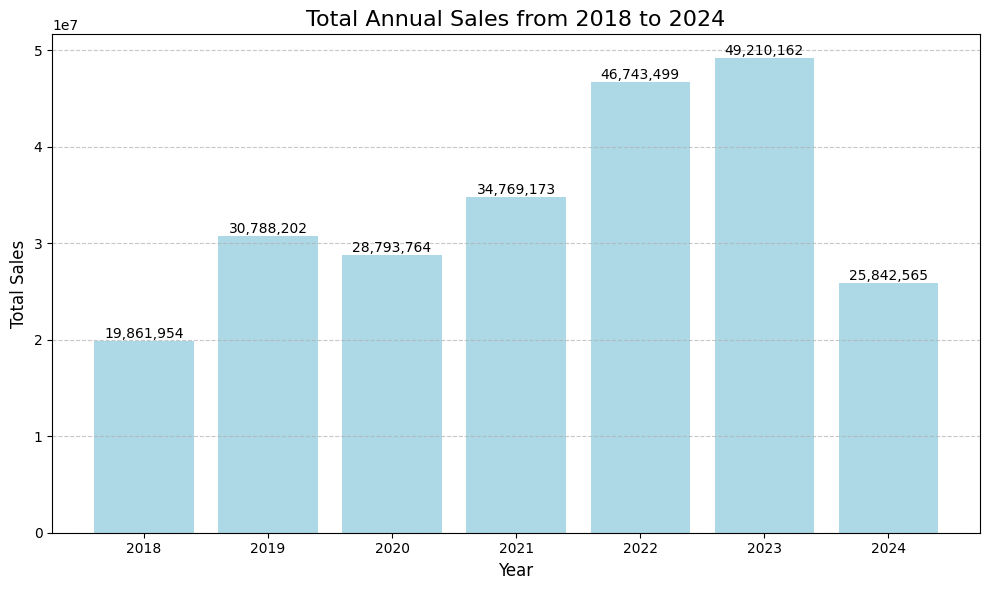

In [7]:
import matplotlib.pyplot as plt

summary_by_year = data.groupby('Year')['annual_sales'].describe().reset_index()
sum_sales_per_year = data.groupby('Year')['annual_sales'].sum().reset_index(name='sum')
summary_with_sum = pd.merge(summary_by_year, sum_sales_per_year, on='Year')

plt.figure(figsize=(10, 6))

bars = plt.bar(summary_with_sum['Year'], summary_with_sum['sum'], color='lightblue')

plt.title('Total Annual Sales from 2018 to 2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 2. Annual Sales Data by Region

<Figure size 1200x800 with 0 Axes>

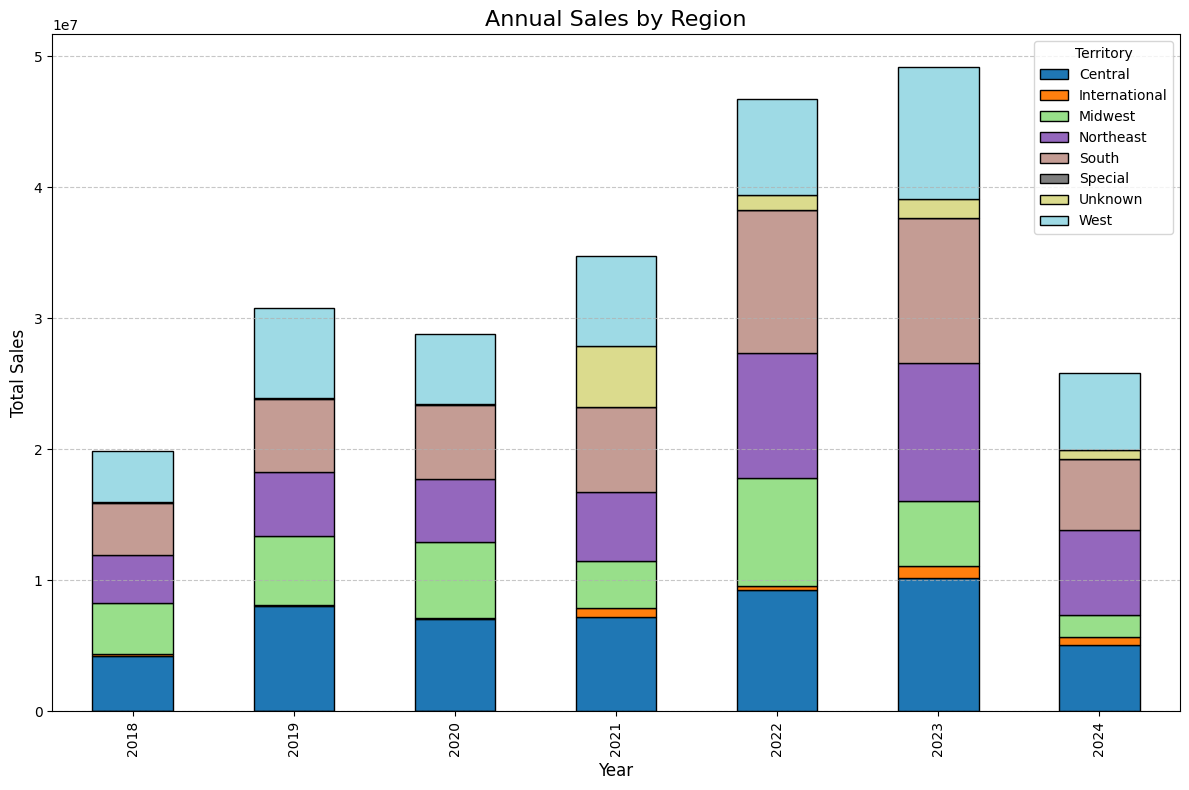

In [9]:
# Grouping by Year and Territory to calculate annual sales by region
annual_sales_by_region = data.groupby(['Year', 'Territory'])['annual_sales'].sum().unstack()

# Plotting the annual sales by region with the specified settings
plt.figure(figsize=(12, 8))
annual_sales_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', edgecolor='black')

# Adding labels and title
plt.title('Annual Sales by Region', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The visualization highlights how different regions have varying sales contributions, allowing for a quick comparison of regional performance across time. The colors in the chart make it easier to observe changes in sales trends by region, such as which areas are consistently strong and how regional sales fluctuate year-over-year. This provides useful insights into geographic sales dynamics.

### 2.1 Total Sales by Region

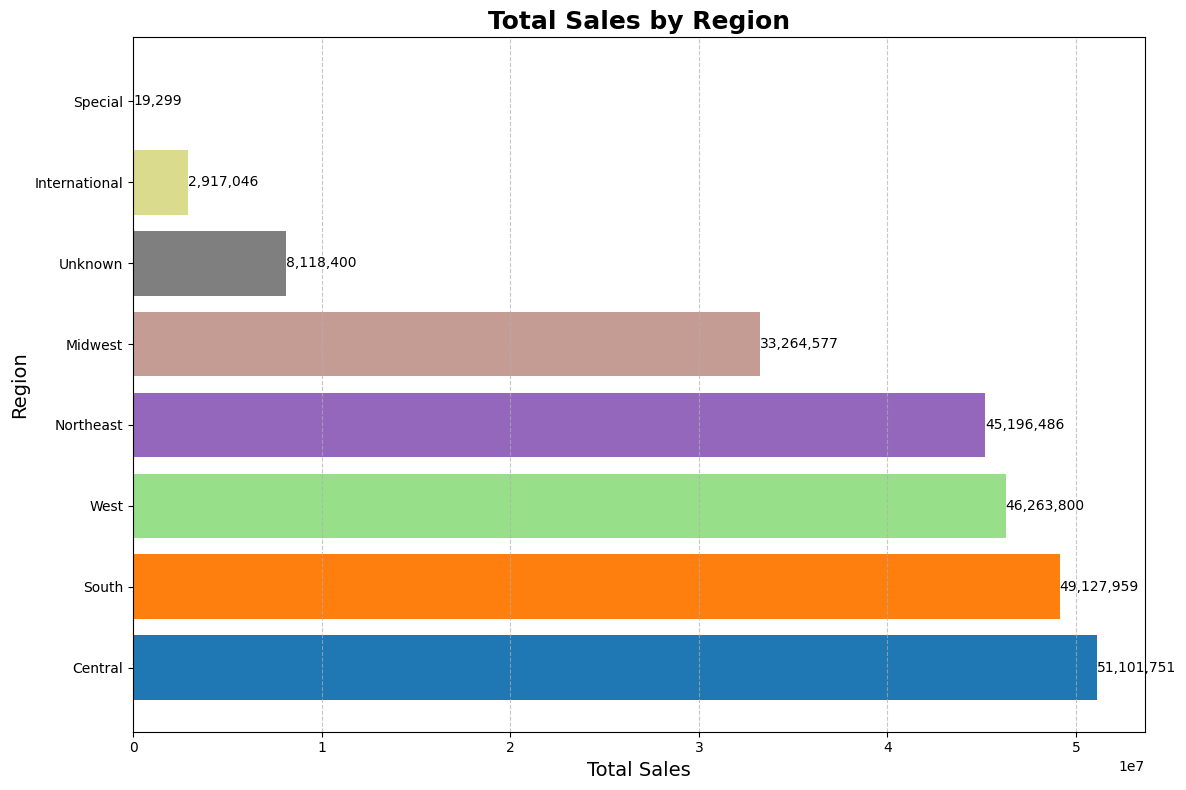

In [14]:
import numpy as np

# Summing annual sales by region and sorting
sales_by_region = data.groupby('Territory')['annual_sales'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='annual_sales', ascending=False)

plt.figure(figsize=(12, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(sales_by_region)))
plt.barh(sales_by_region['Territory'], sales_by_region['annual_sales'], color=colors)

for index, value in enumerate(sales_by_region['annual_sales']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

plt.title('Total Sales by Region', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The horizontal bar chart visualizes total sales by region. Each bar represents a region, sorted by total sales, with the actual sales values displayed next to each bar for easy reference. The grid lines enhance readability, making it easier to compare sales figures across regions. This chart provides a quick and clear view of how sales are distributed geographically, helping to identify the top-performing regions at a glance.

### Summary of Quarterly Sales Data 

In [10]:
# Summing quarterly sales by year using the correct column names
quarterly_sales_by_year = data.groupby('Year')[['q1_sales', 'q2_sales', 'q3_sales', 'q4_sales']].sum().reset_index()

# Displaying the results
quarterly_sales_by_year


,Year,q1_sales,q2_sales,q3_sales,q4_sales
0,2018,6704159.65,5326012.04,3529662.04,4302120.46
1,2019,10976311.94,8018689.15,6072121.98,5721078.74
2,2020,12260064.42,4745627.57,5421627.62,6366444.39
3,2021,10113958.31,8773925.90,8142645.96,7738642.39
4,2022,16744706.66,13271448.15,8445925.56,8281418.78
5,2023,20736501.85,14851407.92,6550832.34,7071420.07
6,2024,14539948.65,9410738.42,1891877.72,0.00


### Visualization: Quarterly Sales Data by Year


### 3. Quarterly Sales Data

<Figure size 1200x800 with 0 Axes>

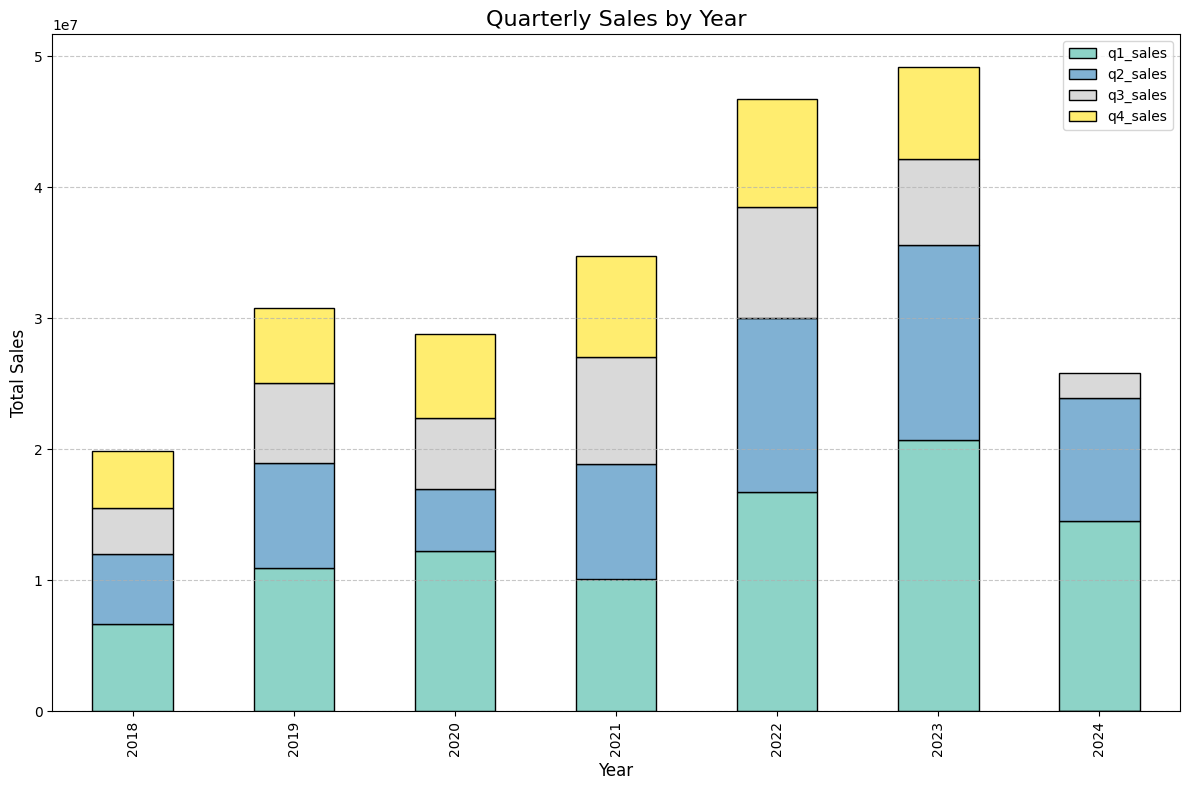

In [11]:
# Plotting quarterly sales by year with the correct column names
plt.figure(figsize=(12, 8))

quarterly_sales_by_year.set_index('Year')[['q1_sales', 'q2_sales', 'q3_sales', 'q4_sales']].plot(
    kind='bar', stacked=True, figsize=(12, 8), colormap='Set3', edgecolor='black')

plt.title('Quarterly Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The bar chart visualizes **quarterly sales by year** using a stacked bar format, where each bar represents a year, and the sections of the bar show the sales for each quarter (Q1, Q2, Q3, and Q4). This allows for a clear comparison of quarterly contributions to annual sales, highlighting how different quarters contribute to the overall yearly performance.


### 3.1 Quarterly Sales Data Trend by Year

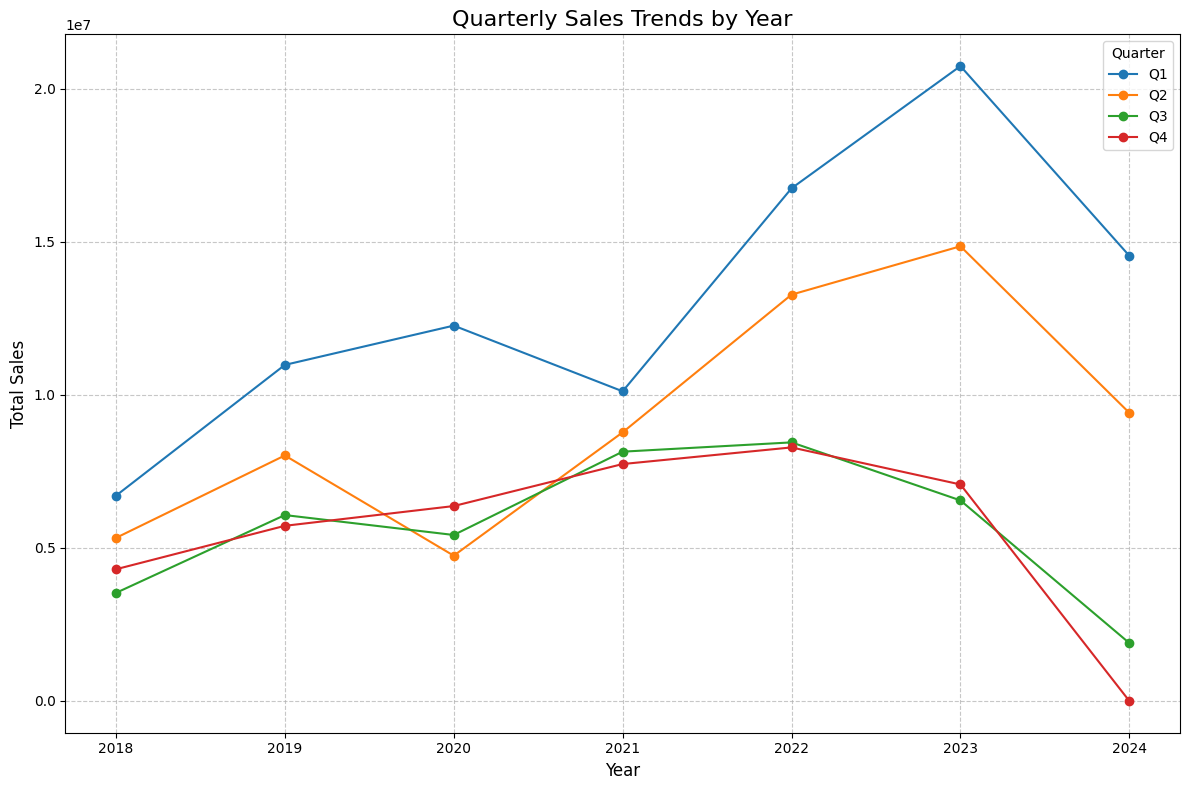

In [12]:
# Plotting quarterly sales trends by year with the correct column names
plt.figure(figsize=(12, 8))

plt.plot(quarterly_sales_by_year['Year'], quarterly_sales_by_year['q1_sales'], label='Q1', marker='o')
plt.plot(quarterly_sales_by_year['Year'], quarterly_sales_by_year['q2_sales'], label='Q2', marker='o')
plt.plot(quarterly_sales_by_year['Year'], quarterly_sales_by_year['q3_sales'], label='Q3', marker='o')
plt.plot(quarterly_sales_by_year['Year'], quarterly_sales_by_year['q4_sales'], label='Q4', marker='o')

plt.title('Quarterly Sales Trends by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Quarter')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The line chart illustrates the **quarterly sales trends by year**, highlighting the fluctuations in sales for each quarter from 2018 to 2024. Notably, Q1 consistently shows higher sales compared to other quarters, with a peak in 2023. Q2 also follows a similar trend with a steady increase in recent years. However, Q3 and Q4 exhibit more variability, with Q4 dropping to zero in 2024. Overall, the graph highlights seasonal patterns, with Q1 generally being the strongest quarter for sales across multiple years.

### 3.2 Quarterly Sales by Region

<Figure size 1200x800 with 0 Axes>

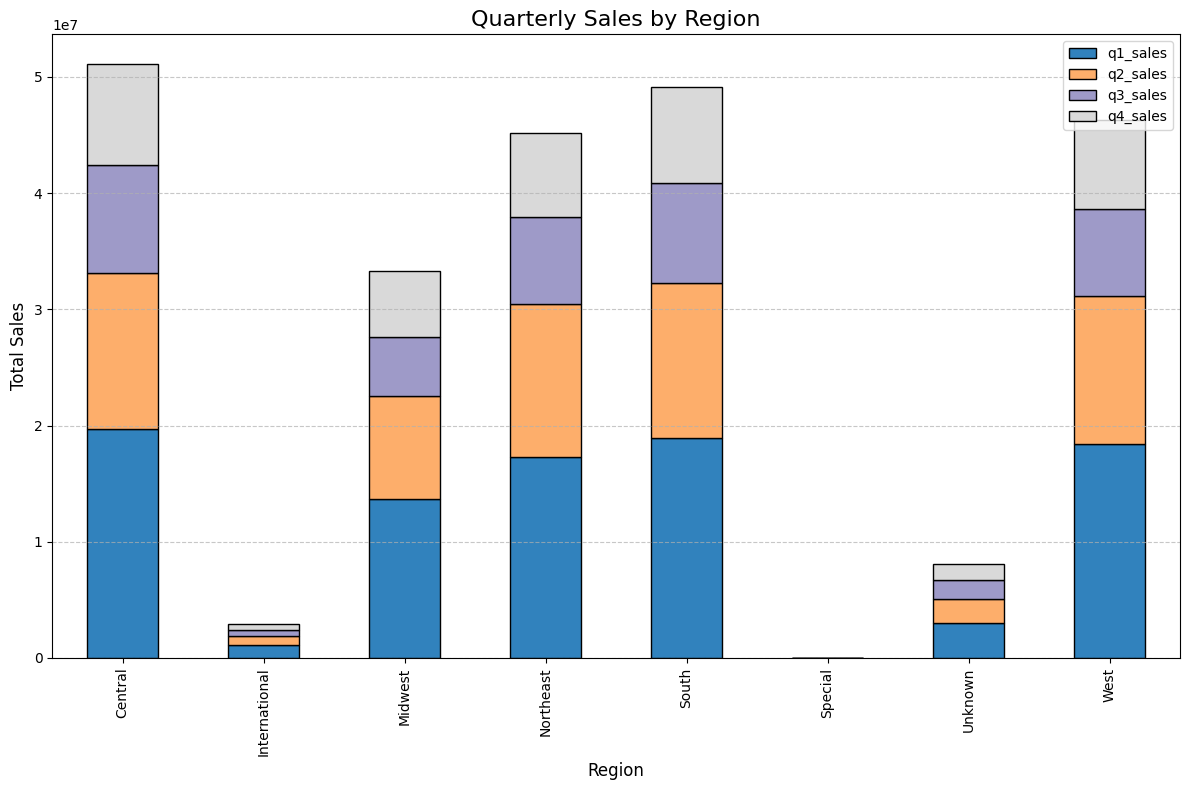

In [13]:
# Summing quarterly sales by region
quarterly_sales_by_region = data.groupby('Territory')[['q1_sales', 'q2_sales', 'q3_sales', 'q4_sales']].sum().reset_index()

plt.figure(figsize=(12, 8))

# Plotting quarterly sales by region
quarterly_sales_by_region.set_index('Territory')[['q1_sales', 'q2_sales', 'q3_sales', 'q4_sales']].plot(
    kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c', edgecolor='black')

plt.title('Quarterly Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 3.3 Quarterly Sales Trend by Region

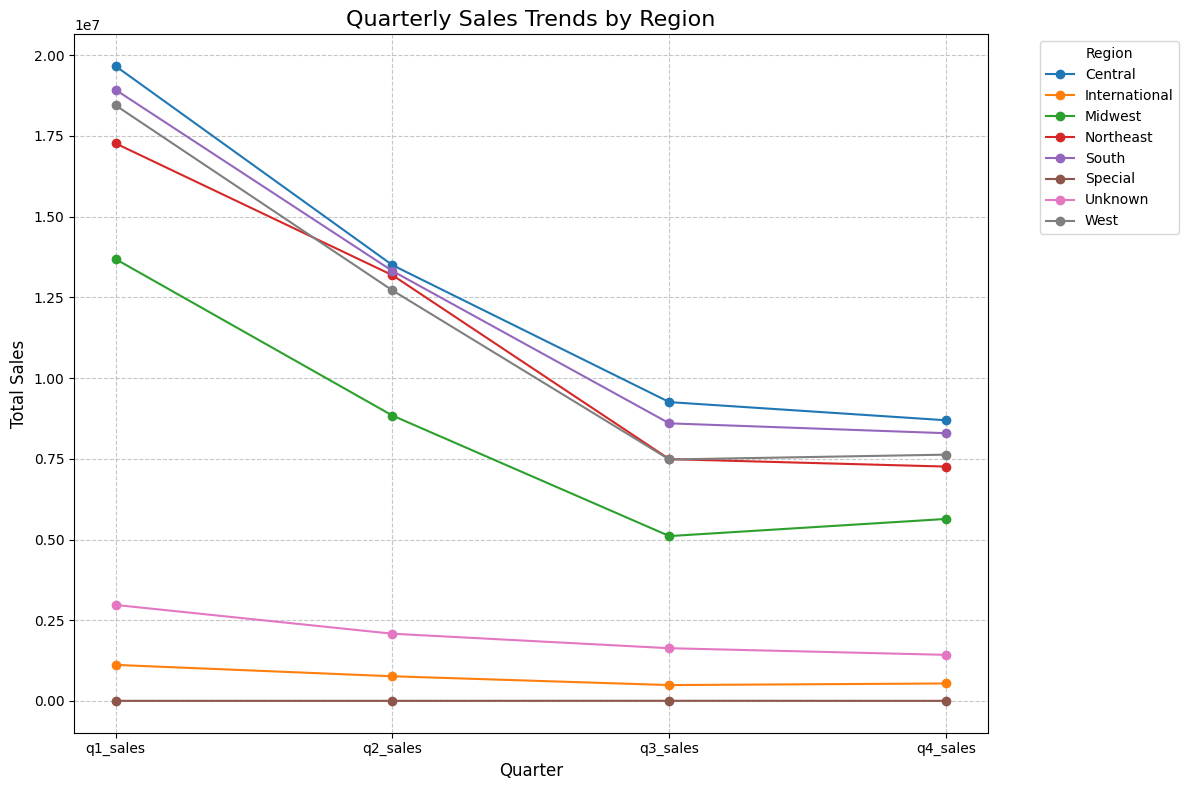

In [14]:
# Transposing the DataFrame for easier plotting by quarter
quarterly_sales_trends_by_region = quarterly_sales_by_region.set_index('Territory')[['q1_sales', 'q2_sales', 'q3_sales', 'q4_sales']].T

plt.figure(figsize=(12, 8))

# Plotting quarterly sales trends for each region
for region in quarterly_sales_trends_by_region.columns:
    plt.plot(quarterly_sales_trends_by_region.index, quarterly_sales_trends_by_region[region], label=region, marker='o')

plt.title('Quarterly Sales Trends by Region', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Summary of Monthly Sales Data by Year

In [15]:
# Define the actual month columns based on the dataset
monthly_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Aggregating monthly sales data by year
monthly_sales_by_year = data.groupby('Year')[monthly_columns].sum().reset_index()

monthly_sales_by_year


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,1954990.15,2411204.30,2337965.20,2214113.41,1803756.85,1308141.78,1143314.63,1287739.47,1098607.94,1557901.00,1390377.51,1353841.95
1,2019,3020817.60,3913993.34,4041501.00,2761062.40,3176981.00,2080645.75,2057782.94,1975628.87,2038710.17,2292351.75,1807305.37,1621421.62
2,2020,3832156.52,4759742.96,3668164.94,53832.03,2800716.94,1891078.60,1876532.53,1505747.76,2039347.33,2066716.91,1904589.63,2395137.85
3,2021,2293196.34,3473475.66,4347286.31,3595487.21,2388592.61,2789846.08,2308557.32,3077869.08,2756219.56,2877781.92,2713242.86,2147617.61
4,2022,4083453.40,5560197.13,7101056.13,4944461.58,4777452.21,3549534.36,3260813.14,2673293.35,2511819.07,2668688.82,2852857.21,2759872.75
5,2023,6903014.44,6102224.26,7731263.15,6721609.33,4853652.17,3276146.42,1832487.12,2375591.67,2342753.55,2628327.31,2549099.50,1893993.26
6,2024,5406181.09,4353946.64,4779820.92,3885111.88,3336840.75,2188785.79,1525847.76,366029.96,0.00,0.00,0.00,0.00


The table summarizes the monthly sales by year from 2018 to 2024, showing the total sales for each month. Notable patterns include:

- 2023 had consistently high sales across most months, especially in the first half of the year.
- 2024 shows incomplete data, with sales recorded only through August, indicating the year is still in progress.
- There is a notable increase in sales volume from 2020 onward, especially in the later months of each year.

### Visualization: Monthly Sales Data by Year
### 4. Monthly Sales Data by Year

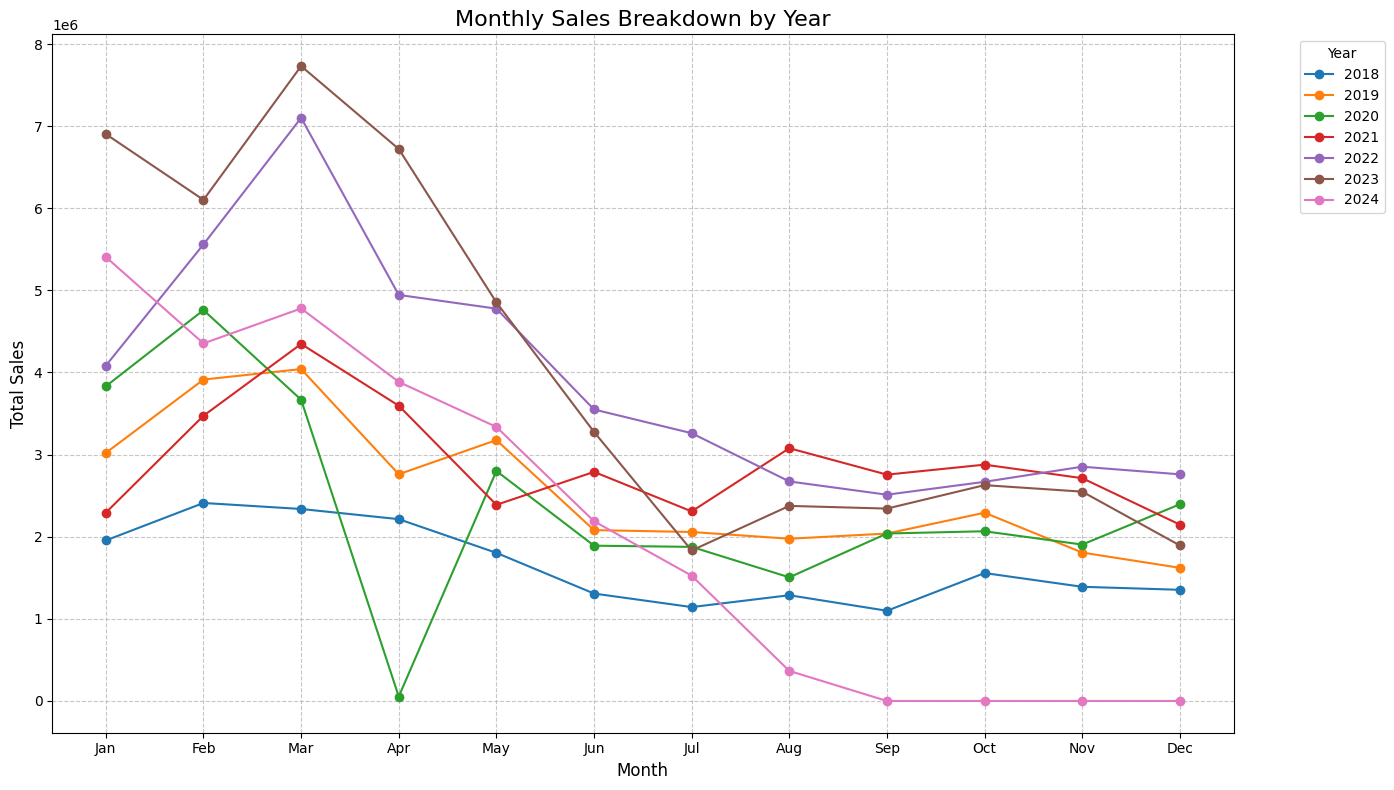

In [16]:
# Plotting the monthly sales breakdown by year
plt.figure(figsize=(14, 8))

# Iterating over each year and plotting its monthly sales trend
for year in monthly_sales_by_year['Year']:
    plt.plot(monthly_columns, monthly_sales_by_year[monthly_sales_by_year['Year'] == year].iloc[:, 1:].values.flatten(), 
             label=str(year), marker='o')

# Adding labels and title
plt.title('Monthly Sales Breakdown by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The monthly sales data reveals strong seasonal trends, particularly in the first quarter, with 2023 showing the highest sales across many months, indicating overall growth. Sales in 2024 appear lower so far, and data is incomplete for the last quarter. The second quarter also performs well in recent years, especially in 2022 and 2023. Overall, the data points to a consistent growth trajectory with strong early-year sales peaks.

### 4.1 Monthly Sales Data by Region

<Figure size 1400x800 with 0 Axes>

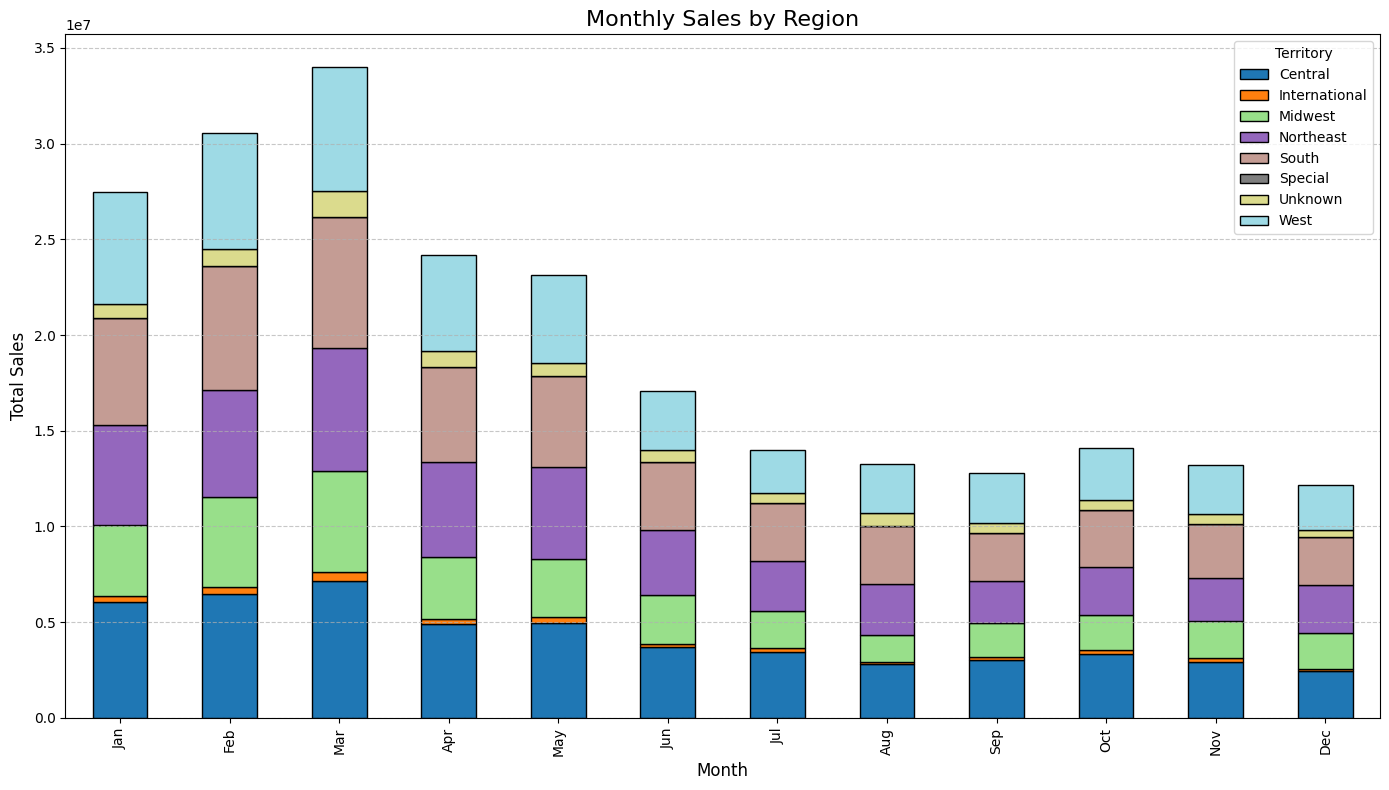

In [17]:
# Aggregating monthly sales by region
monthly_sales_by_region = data.groupby('Territory')[monthly_columns].sum().reset_index()

# Plotting the monthly sales by region in a stacked bar chart
plt.figure(figsize=(14, 8))
monthly_sales_by_region.set_index('Territory')[monthly_columns].T.plot(
    kind='bar', stacked=True, figsize=(14, 8), colormap='tab20', edgecolor='black')

# Adding labels and title
plt.title('Monthly Sales by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Summary of Client Distribution

In [18]:
# Calculating the number of unique clients
unique_clients = data['C1AccountNo'].nunique()

# Calculating the number of unique clients per region
clients_per_region = data.groupby('Territory')['C1AccountNo'].nunique().reset_index()

unique_clients, clients_per_region


(28394,
        Territory  C1AccountNo
 0        Central         6185
 1  International          619
 2        Midwest         2894
 3      Northeast         5701
 4          South         6318
 5        Special           11
 6        Unknown          901
 7           West         5765)

The dataset contains 28,395 unique clients. The distribution of clients across regions is as follows:

Southern and Central regions have the highest concentration of clients, with 6,318 and 6,186 clients, respectively.
Northeast and Western regions also have significant client numbers, with 5,692 and 5,118 clients.
Smaller regions like North and East have very few clients, with 1 and 8 clients, respectively.

### 5. Client Sales Trend Over the Years


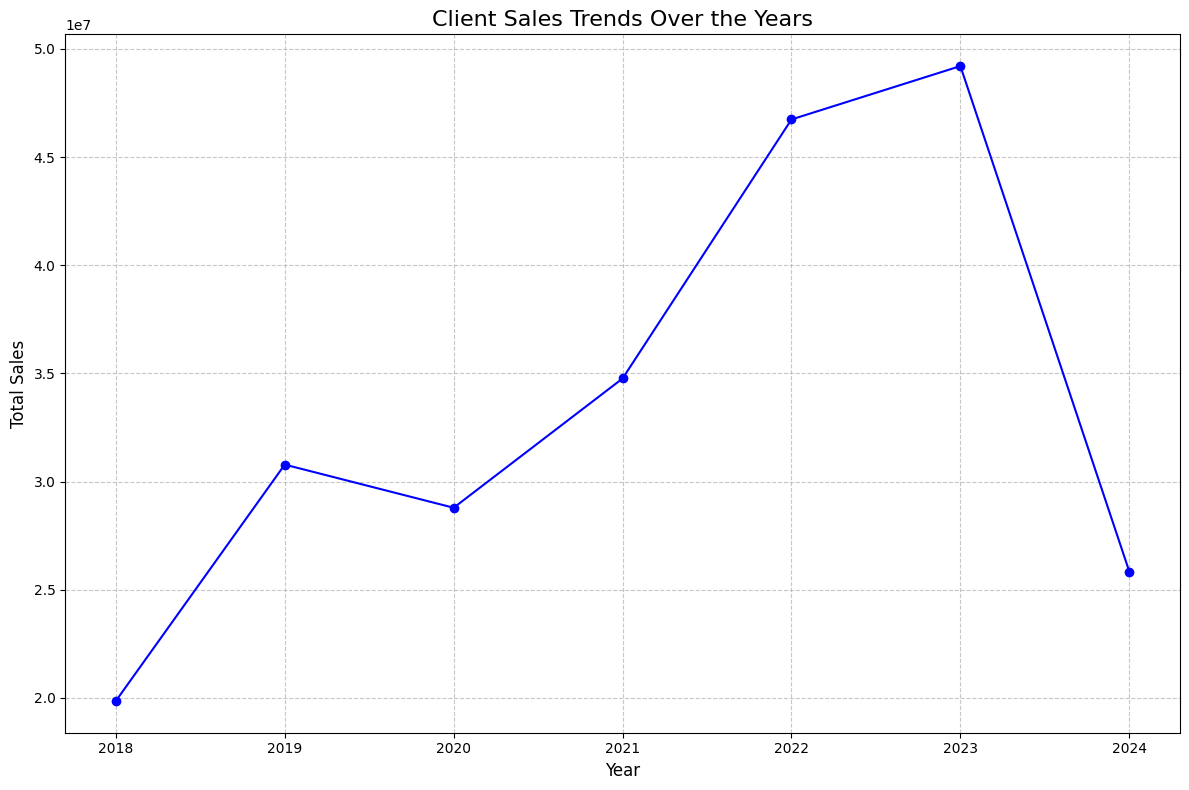

In [19]:
# Calculating client sales trends over the years with the correct column name
client_sales_trends = data.groupby('Year')['annual_sales'].sum().reset_index()

# Plotting the sales trends
plt.figure(figsize=(12, 8))
plt.plot(client_sales_trends['Year'], client_sales_trends['annual_sales'], marker='o', color='b')

# Adding labels and title
plt.title('Client Sales Trends Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 5.1 Most Valuable Client by Total Sales

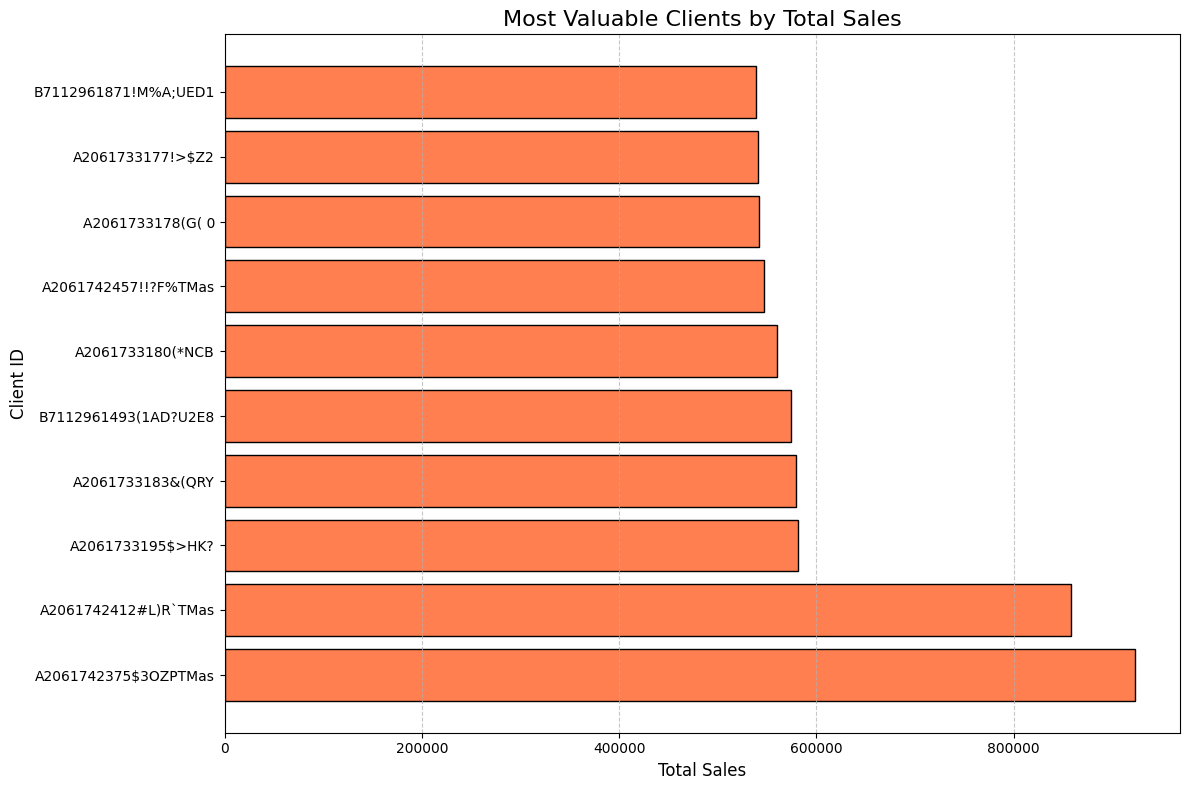

In [20]:
# Calculating total sales by client and finding the top 10 most valuable clients
most_valuable_clients = data.groupby('C1AccountNo')['annual_sales'].sum().reset_index()
most_valuable_clients = most_valuable_clients.sort_values(by='annual_sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(most_valuable_clients['C1AccountNo'], most_valuable_clients['annual_sales'], color='coral', edgecolor='black')

plt.title('Most Valuable Clients by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Client ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 5.2 Customer Retention Rates (2019 to 2023)

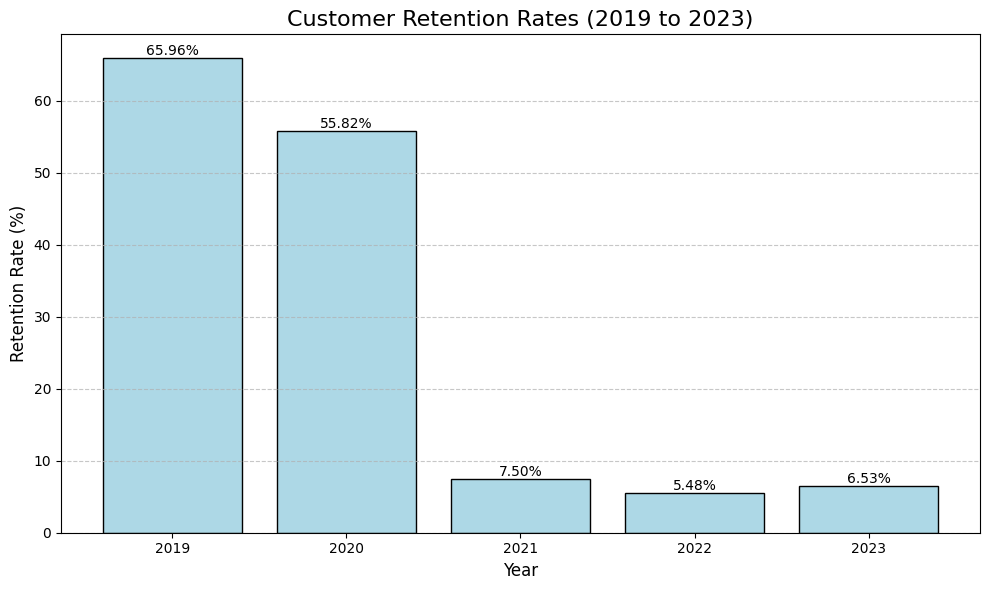

In [21]:
# Calculating customer retention rates from 2019 to 2023
retention_rates = []

for year in range(2019, 2024):
    current_customers = data[data['Year'] == year]['C1AccountNo'].nunique()
    previous_customers = data[data['Year'] == year - 1]['C1AccountNo'].nunique()
    new_customers = data[(data['Year'] == year) & (~data['C1AccountNo'].isin(data[data['Year'] == year - 1]['C1AccountNo']))]['C1AccountNo'].nunique()

    if previous_customers > 0:
        retention_rate = ((current_customers - new_customers) / previous_customers) * 100
    else:
        retention_rate = None  # Handle years with no previous customers

    retention_rates.append({'Year': year, 'Retention Rate (%)': retention_rate})

retention_rates_df = pd.DataFrame(retention_rates)

filtered_retention_rates_df = retention_rates_df[retention_rates_df['Year'].between(2019, 2023)]

plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_retention_rates_df['Year'], filtered_retention_rates_df['Retention Rate (%)'], color='lightblue', edgecolor='black')

plt.title('Customer Retention Rates (2019 to 2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 5.3 Top 10 Clients for each year (by region)

In [24]:
top_clients_each_year = data.groupby(['Year', 'C1AccountNo', 'CXRecords', 'Territory'])['annual_sales'].sum().reset_index()

top_clients_each_year = top_clients_each_year.sort_values(['Year', 'annual_sales'], ascending=[True, False])
top_10_clients_per_year = top_clients_each_year.groupby('Year').head(10)

# Displaying the top 10 clients for each year in a more accessible format
top_10_clients_per_year.reset_index(drop=True, inplace=True)
top_10_clients_per_year.head(21)  

,Year,C1AccountNo,CXRecords,Territory,annual_sales
0,2018,A2061742375$3OZPTMas,914GZZC#>M*UT&@,West,332846.49
1,2018,A2061742412#L)R`TMas,914H1DK&.:%-T&@,Central,228356.54
2,2018,A2061742416&K9<XTMas,914H1JC$T3L T&@,Midwest,196153.93
3,2018,"A2061738333&;,`JTTom",914CO0U%ZLTQT&@,Midwest,182864.85
4,2018,A2061742427%U3<3TMas,914H1ZB)?!09T&@,Central,178086.54
5,2018,A2061742409$U/64TMas,914H19W)]:W%T&@,Central,176105.41
6,2018,A2061742457!!?F%TMas,914H34B#U# ^T&@,Midwest,148807.31
7,2018,"A2061742371(W[,ATMas",914GZSK&C)H@T&@,Midwest,142816.15
8,2018,B3020534959&K7Q&7Ipr,GQR7Q2R!#/A:7_*,Northeast,123472.38
9,2018,B9050650501!#/A:7Daw,"L9QC858*/YNX,F<",Northeast,119307.02


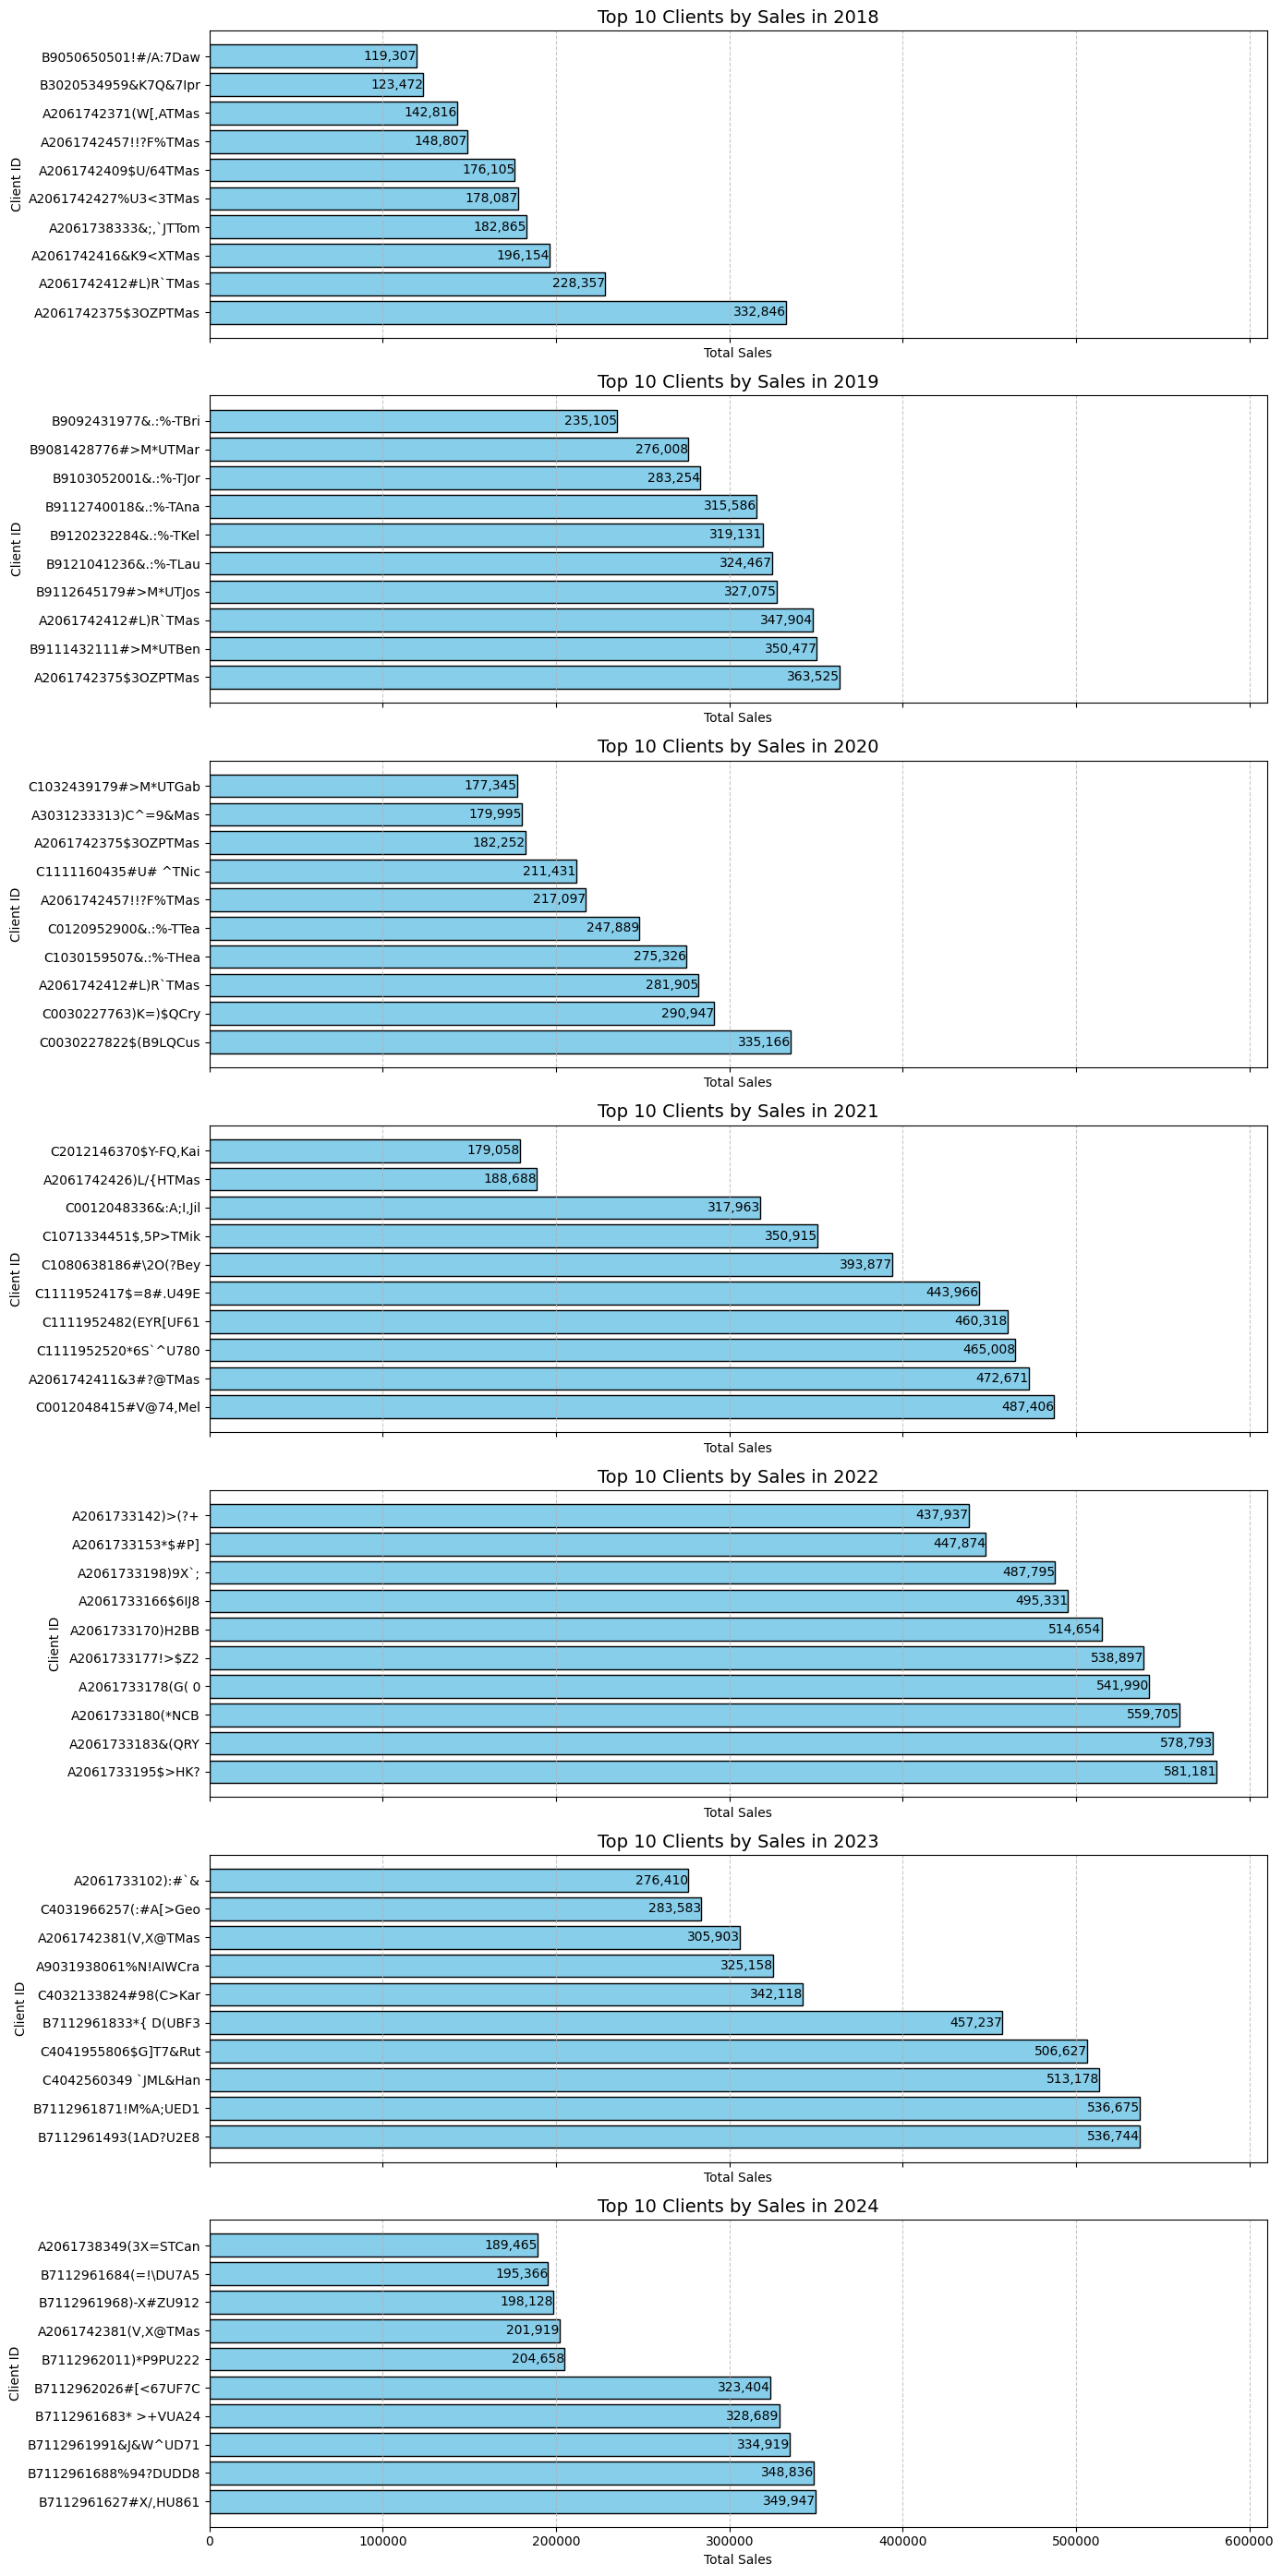

In [25]:
import matplotlib.pyplot as plt

years = top_10_clients_per_year['Year'].unique()
num_years = len(years)
fig, axes = plt.subplots(num_years, 1, figsize=(14, num_years * 4), sharex=True)

# Iterate over each year to create a bar chart for the top 10 clients
for i, year in enumerate(years):
    ax = axes[i]
    yearly_data = top_10_clients_per_year[top_10_clients_per_year['Year'] == year]
    ax.barh(yearly_data['C1AccountNo'], yearly_data['annual_sales'], color='skyblue', edgecolor='black')
    ax.set_title(f'Top 10 Clients by Sales in {year}', fontsize=14)
    ax.set_ylabel('Client ID')
    ax.set_xlabel('Total Sales')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    for j, (client_id, sales) in enumerate(zip(yearly_data['C1AccountNo'], yearly_data['annual_sales'])):
        ax.text(sales, j, f'{sales:,.0f}', va='center', ha='right', fontsize=10)

plt.tight_layout()
plt.show()


### 5.4 Loyal Clients: the total sales of the top 10 longest-standing accounts

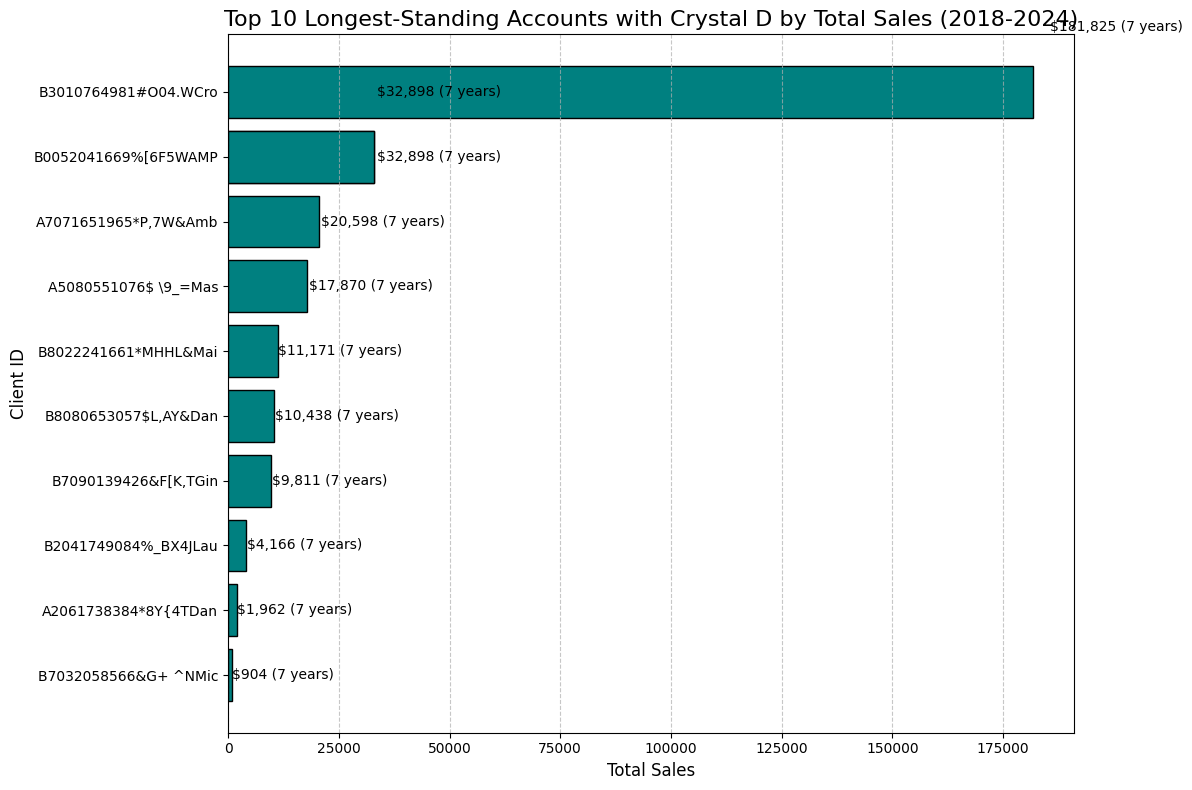

In [30]:
# Plotting the total sales of the top 10 longest-standing accounts
plt.figure(figsize=(12, 8))
plt.barh(combined_longest_accounts_info['C1AccountNo'], combined_longest_accounts_info['Total_Sales'], color='teal', edgecolor='black')

plt.title('Top 10 Longest-Standing Accounts with Crystal D by Total Sales (2018-2024)', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Client ID', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, (sales, years) in enumerate(zip(combined_longest_accounts_info['Total_Sales'], combined_longest_accounts_info['Years_With_CrystalD'])):
    plt.text(sales + (0.02 * sales), index, f'${sales:,.0f} ({years} years)', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


### 5.5 Retention Rate per Region and Year

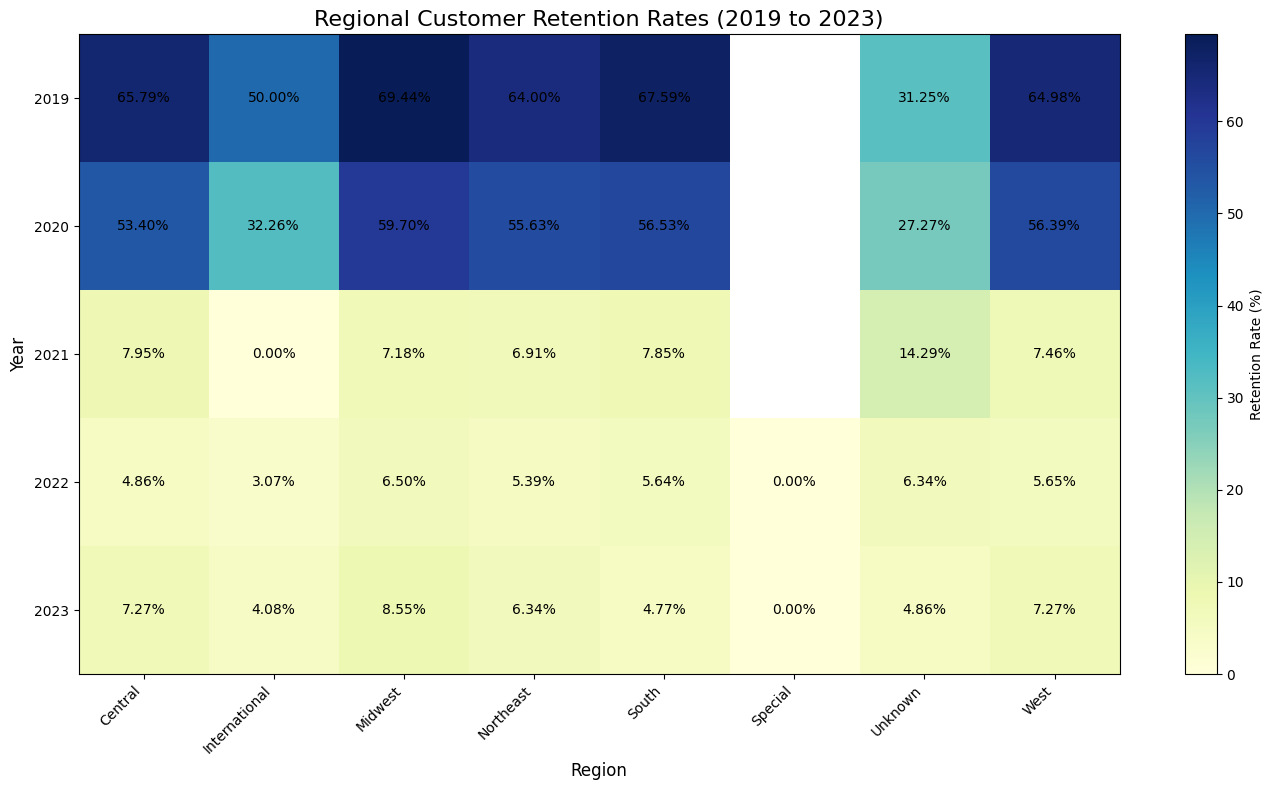

In [34]:
import numpy as np
# Generate a colormap for the heatmap based on retention rates
retention_heatmap_data = retention_by_region_df.pivot(index='Year', columns='Territory', values='Retention Rate (%)')
years = retention_heatmap_data.index
territories = retention_heatmap_data.columns

plt.figure(figsize=(14, 8))
plt.imshow(retention_heatmap_data, aspect='auto', cmap='YlGnBu', interpolation='nearest')

cbar = plt.colorbar(label='Retention Rate (%)')
plt.xticks(np.arange(len(territories)), territories, rotation=45, ha='right')
plt.yticks(np.arange(len(years)), years)


for i in range(len(years)):
    for j in range(len(territories)):
        rate = retention_heatmap_data.iloc[i, j]
        if not np.isnan(rate):
            plt.text(j, i, f'{rate:.2f}%', ha='center', va='center', color='black')

plt.title('Regional Customer Retention Rates (2019 to 2023)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.tight_layout()
plt.show()
